In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [6]:
f = r.TFile("./data/simutree_muonsAndPositrons_col8_plus_73.root")
f.ls()

t = f.Get("trajectoryAnalyzer/t")
t.Print()

TFile**		./data/simutree_muonsAndPositrons_col8_plus_73.root	
 TFile*		./data/simutree_muonsAndPositrons_col8_plus_73.root	
  KEY: TDirectoryFile	simuTreeMaker;1	simuTreeMaker (SimuTreeMaker) folder
  KEY: TDirectoryFile	trajectoryAnalyzer;1	trajectoryAnalyzer (TrajectoryAnalyzer) folder
******************************************************************************
*Tree    :t         : t                                                      *
*Entries :    20000 : Total =         6344345 bytes  File  Size =    2819640 *
*        :          : Tree compression factor =   2.25                       *
******************************************************************************
*Br    0 :caloX     : vector<float>                                          *
*Entries :    20000 : Total  Size=     559693 bytes  File Size  =     347624 *
*Baskets :       20 : Basket Size=      32000 bytes  Compression=   1.61     *
*............................................................................*


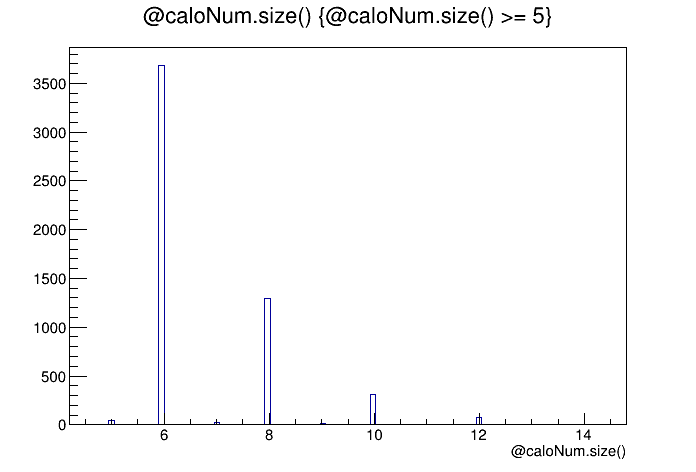

In [11]:
c = r.TCanvas()
t.Draw("@caloNum.size()","@caloNum.size() >= 5","")
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: pdf file ./images/singles_doubles_triples_noCut.pdf has been created
Info in <TCanvas::Print>: png file ./images/singles_doubles_triples_noCut.png has been created


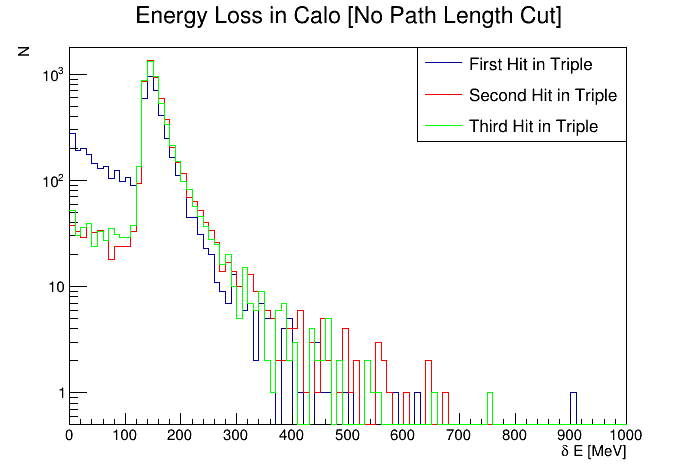

In [87]:
tripleCondition = "@caloNum.size() >= 5"
newTripCon = (tripleCondition+" && TMath::ATan2(caloX[0], caloZ[0]) - TMath::ATan2(caloX[1], caloZ[1]) > 0.019"
              +" && TMath::ATan2(caloX[2], caloZ[2]) - TMath::ATan2(caloX[3], caloZ[3]) > 0.019"
              +" && TMath::ATan2(caloX[4], caloZ[4]) - TMath::ATan2(caloX[5], caloZ[5]) > 0.019"
             )

h = r.TH1D("h","Energy Loss in Calo [No Path Length Cut]; #delta E [MeV]; N",100,0,1000)
h2 = h.Clone("h2")
h2.SetLineColor(2)
h3 = h.Clone("h3")
h3.SetLineColor(3)


c = r.TCanvas()
t.Draw("caloE[0] - caloE[1]>>h",tripleCondition,"")
t.Draw("caloE[2] - caloE[3]>>h2",tripleCondition,"same")
t.Draw("caloE[4] - caloE[5]>>h3",tripleCondition,"same")
c.SetLogy()

leg = r.TLegend(0.6,0.7,0.9,0.9)
leg.AddEntry(h,"First Hit in Triple", "l")
leg.AddEntry(h2,"Second Hit in Triple", "l")
leg.AddEntry(h3,"Third Hit in Triple", "l")
leg.Draw()

c.Print("./images/singles_doubles_triples_noCut.pdf")
c.Print("./images/singles_doubles_triples_noCut.png")

c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: pdf file ./images/singles_doubles_triples_withCut.pdf has been created
Info in <TCanvas::Print>: png file ./images/singles_doubles_triples_withCut.png has been created


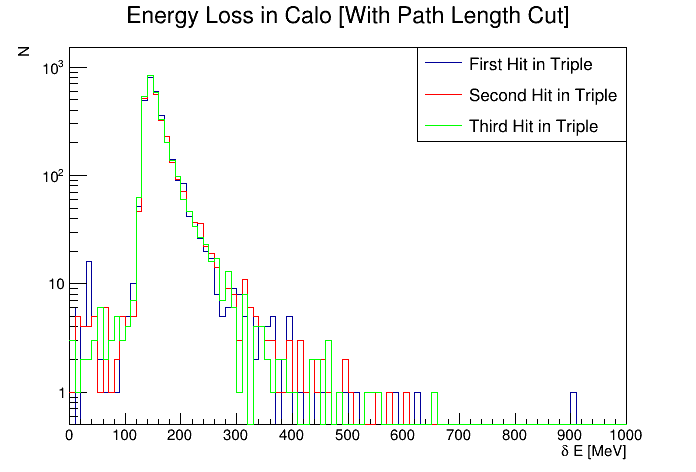

In [88]:
c = r.TCanvas()

h = r.TH1D("h","Energy Loss in Calo [With Path Length Cut]; #delta E [MeV]; N",100,0,1000)
h2 = h.Clone("h2")
h2.SetLineColor(2)
h3 = h.Clone("h3")
h3.SetLineColor(3)

t.Draw("caloE[0] - caloE[1]>>h",newTripCon,"")
t.Draw("caloE[2] - caloE[3]>>h2",newTripCon,"same")
t.Draw("caloE[4] - caloE[5]>>h3",newTripCon,"same")
c.SetLogy()

leg = r.TLegend(0.6,0.7,0.9,0.9)
leg.AddEntry(h,"First Hit in Triple", "l")
leg.AddEntry(h2,"Second Hit in Triple", "l")
leg.AddEntry(h3,"Third Hit in Triple", "l")
leg.Draw()

c.Print("./images/singles_doubles_triples_withCut.pdf")
c.Print("./images/singles_doubles_triples_withCut.png")

c.Draw()

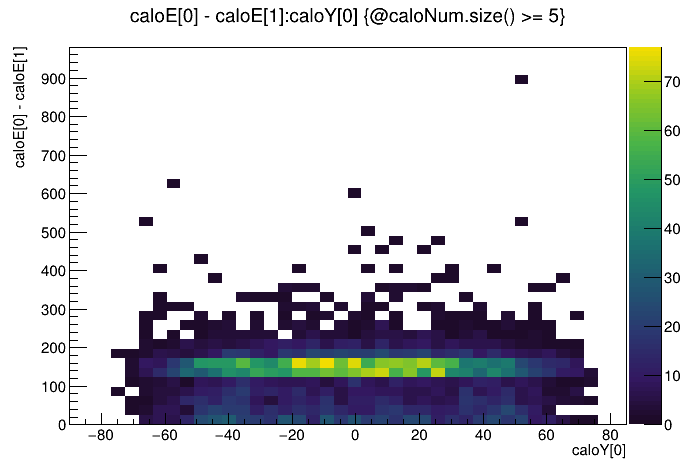

In [21]:
c = r.TCanvas()
t.Draw("caloE[0] - caloE[1]:caloY[0]",tripleCondition,"colz")
c.Draw()

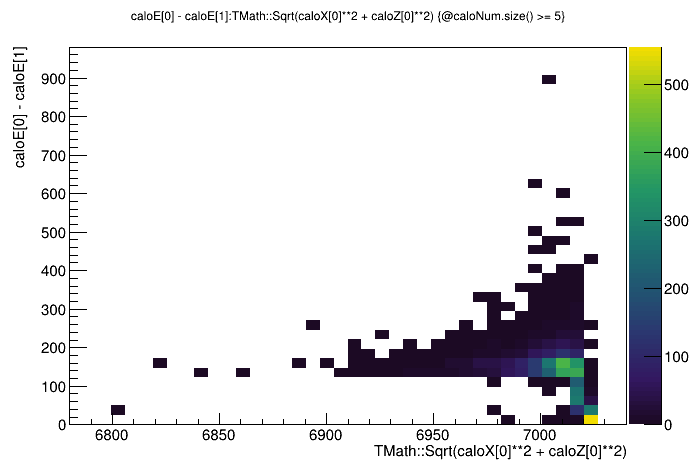

In [22]:
c = r.TCanvas()
t.Draw("caloE[0] - caloE[1]:TMath::Sqrt(caloX[0]**2 + caloZ[0]**2)",tripleCondition,"colz")
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


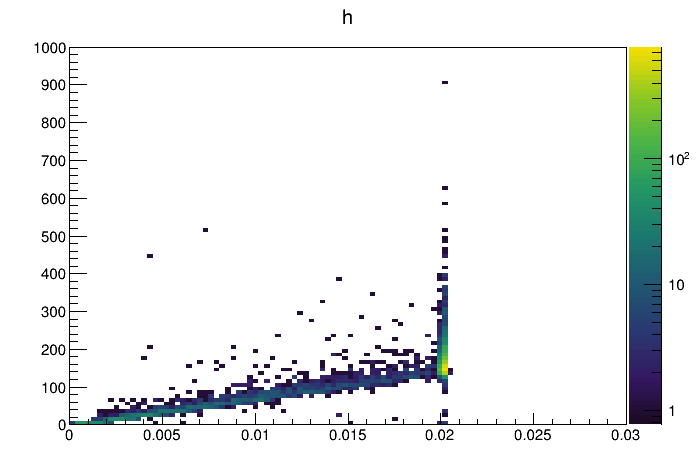

In [32]:
c = r.TCanvas()
h = r.TH2D("h","h",100,0,0.03,100,0,1000)
t.Draw("caloE[0] - caloE[1]:TMath::ATan2(caloX[0], caloZ[0]) - TMath::ATan2(caloX[1], caloZ[1])>>h",tripleCondition,"colz")
c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


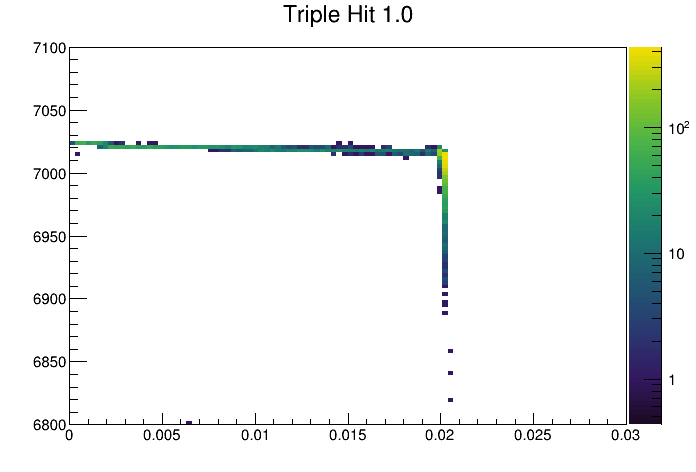

In [79]:
triple = 0
c = r.TCanvas()
h = r.TH2D("h","Triple Hit "+str(triple/2 + 1),100,0,0.03,100,6800,7100)
t.Draw("TMath::Sqrt(caloX["+str(triple)+"]**2 + caloZ["+str(triple)+"]**2):TMath::ATan2(caloX["+str(triple)+"], caloZ["+str(triple)+"]) - TMath::ATan2(caloX["+str(triple+1)+"], caloZ["+str(triple+1)+"])>>h",tripleCondition,"colz")
c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


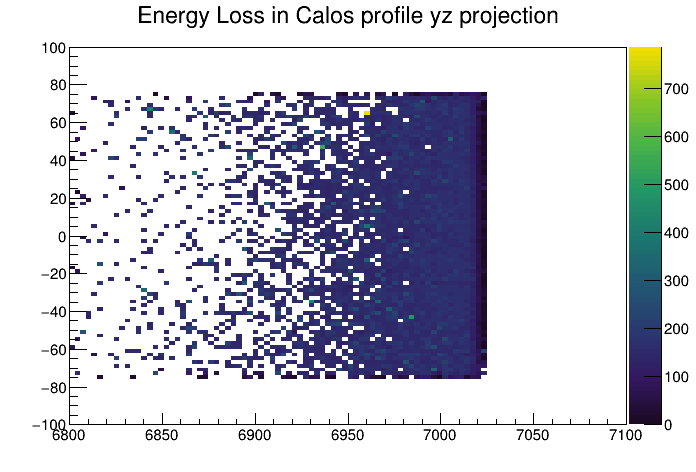

In [73]:
triple = 0
c = r.TCanvas()
h = r.TH3I("h","Energy Loss in Calos; #delta E [MeV]; y [mm]; R [mm]",
          100,0,1000,
          100,-100,100,
          100,6800,7100)
t.Draw("TMath::Sqrt(caloX["+str(triple)+"]**2 + caloZ["+str(triple)+"]**2):caloY["+str(triple)+"]:caloE[0] - caloE[1]>>h","","goff")

#h.Draw("lego2z")
#h.Project3D("yz").Draw("colz")
h.Project3DProfile("yz").Draw('colz')
#c.SetLogz()
c.Draw()